In [1]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline

# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 40)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook")

from bs4 import BeautifulSoup
from collections import OrderedDict # provides the ordered dictionary
import re # for regular expressions used below
import urllib # to read from URLs
import json
import networkx as nx # network analysis
from networkx.readwrite import json_graph
import itertools
import os.path
from datetime import datetime # for time measurement
import sys
import os
import pickle
import subprocess as subp
import gzip
import math
import codecs

from jellyfish import jaro_distance, jaro_winkler, hamming_distance, levenshtein_distance, metaphone, nysiis, soundex
import scipy.cluster.hierarchy as scipycluster
from sklearn.feature_extraction.text import TfidfVectorizer

from skimage import io, exposure
from scipy.spatial import distance
# import the k-means algorithm
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import pairwise_distances_argmin,pairwise_distances_argmin_min, pairwise_distances
from sklearn.metrics.pairwise import euclidean_distances




def printLog(text):
    now=str(datetime.now())
    print("["+now+"]\t"+text)
    # forces to output the result of the print command immediately, see: http://stackoverflow.com/questions/230751/how-to-flush-output-of-python-print
    sys.stdout.flush()
    
def pickleCompress(fileName,pickledObject):
    printLog("Pickling to '%s'" %fileName)
    f = gzip.open(fileName,'wb')
    pickle.dump(pickledObject,f)
    f.close()
    printLog("Pickling done.")
    
def pickleDecompress(fileName):
    #restore the object
    printLog("Depickling from '%s'" %fileName)
    f = gzip.open(fileName,'rb')
    pickledObject = pickle.load(f)
    f.close()
    printLog("Depickling done.")
    return pickledObject



In [2]:
!pip install jellyfish

In [3]:
words = u'Berlin Balin Cölln Köln Cologne Zürich Zurich Bern'.split()

print("Number of words: %i" % len(words))
for i,val in enumerate(words):
    print(str(i)+":\t "+str(val.encode('utf-8')))
    
r=np.triu_indices(n=len(words), k=1)
r

Number of words: 8
0:	 b'Berlin'
1:	 b'Balin'
2:	 b'C\xc3\xb6lln'
3:	 b'K\xc3\xb6ln'
4:	 b'Cologne'
5:	 b'Z\xc3\xbcrich'
6:	 b'Zurich'
7:	 b'Bern'


(array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3,
        4, 4, 4, 5, 5, 6]),
 array([1, 2, 3, 4, 5, 6, 7, 2, 3, 4, 5, 6, 7, 3, 4, 5, 6, 7, 4, 5, 6, 7,
        5, 6, 7, 6, 7, 7]))

In [4]:
def d_demo(coord):
    i, j = coord
    # the distance fix we have learnt about before...
    return 1-jaro_distance(words[i], words[j])

# http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.set_printoptions.html
np.set_printoptions(precision=4)

# axis (3rd parameter): 0= along y axis, 1= along x axis
r2=np.apply_along_axis(d_demo, 0, r)
r2

array([0.1778, 0.4222, 0.3889, 0.4603, 0.4444, 0.4444, 0.1111, 0.4   ,
       0.3667, 0.4381, 0.5444, 0.5444, 0.3667, 0.2167, 0.3238, 1.    ,
       1.    , 0.5167, 0.4048, 1.    , 1.    , 0.5   , 1.    , 1.    ,
       0.5357, 0.1111, 0.5278, 0.5278])

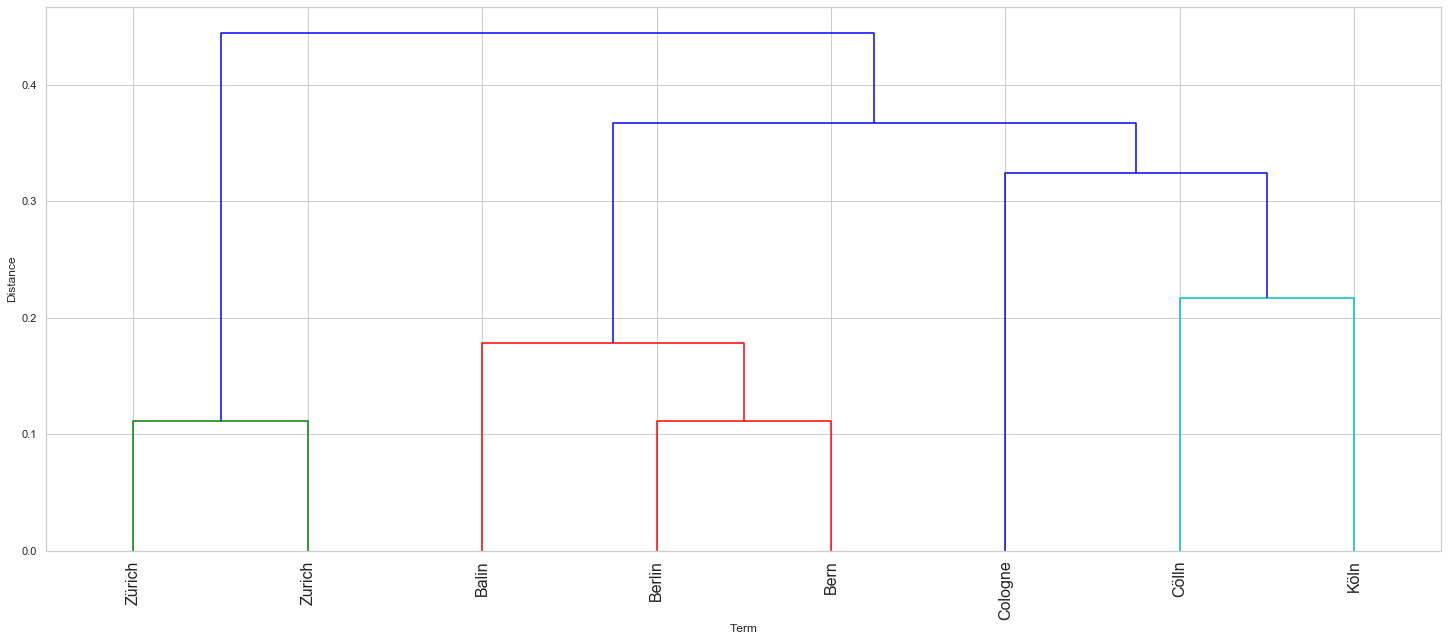

In [5]:
Z=scipycluster.linkage(r2,method='single')

plt.figure(figsize=(25, 10))
#plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Term')
plt.ylabel('Distance')
scipycluster.dendrogram(
        Z,
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=16.,  # font size for the x axis labels
        labels=words
    )
plt.show()

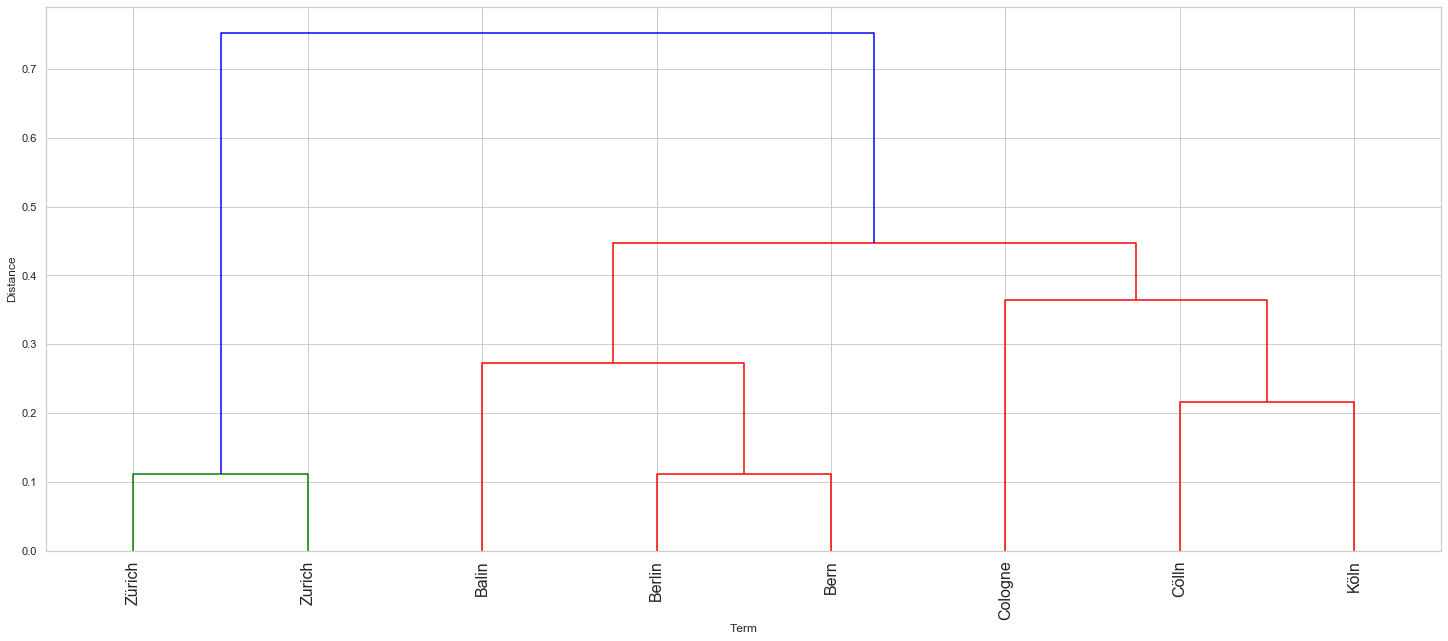

In [6]:
Z=scipycluster.linkage(r2,method='average')

plt.figure(figsize=(25, 10))
#plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Term')
plt.ylabel('Distance')
scipycluster.dendrogram(
        Z,
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=16.,  # font size for the x axis labels
        labels=words
    )
plt.show()

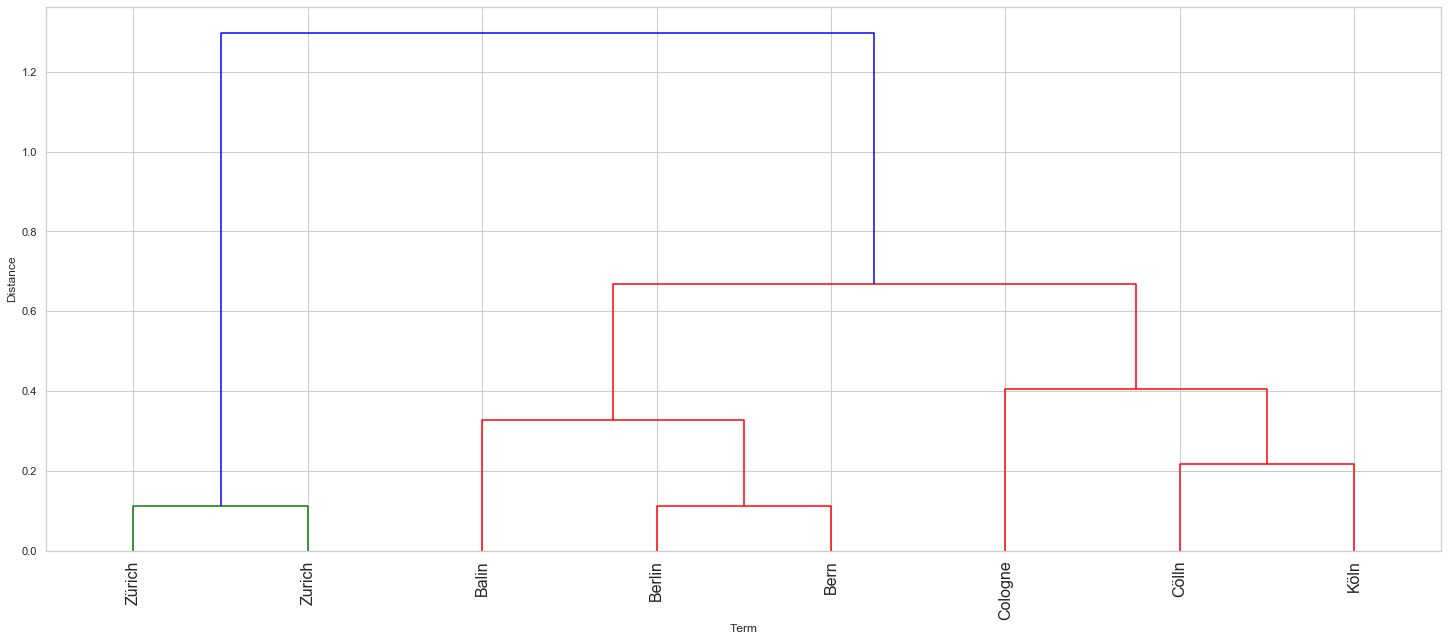

In [7]:
Z=scipycluster.linkage(r2,method='ward')

plt.figure(figsize=(25, 10))
#plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Term')
plt.ylabel('Distance')
scipycluster.dendrogram(
        Z,
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=16.,  # font size for the x axis labels
        labels=words
    )
plt.show()

Number of words: 8
0:	 b'BRLN'
1:	 b'BLN'
2:	 b'KLN'
3:	 b'KLN'
4:	 b'KLN'
5:	 b'SRX'
6:	 b'SRX'
7:	 b'BRN'


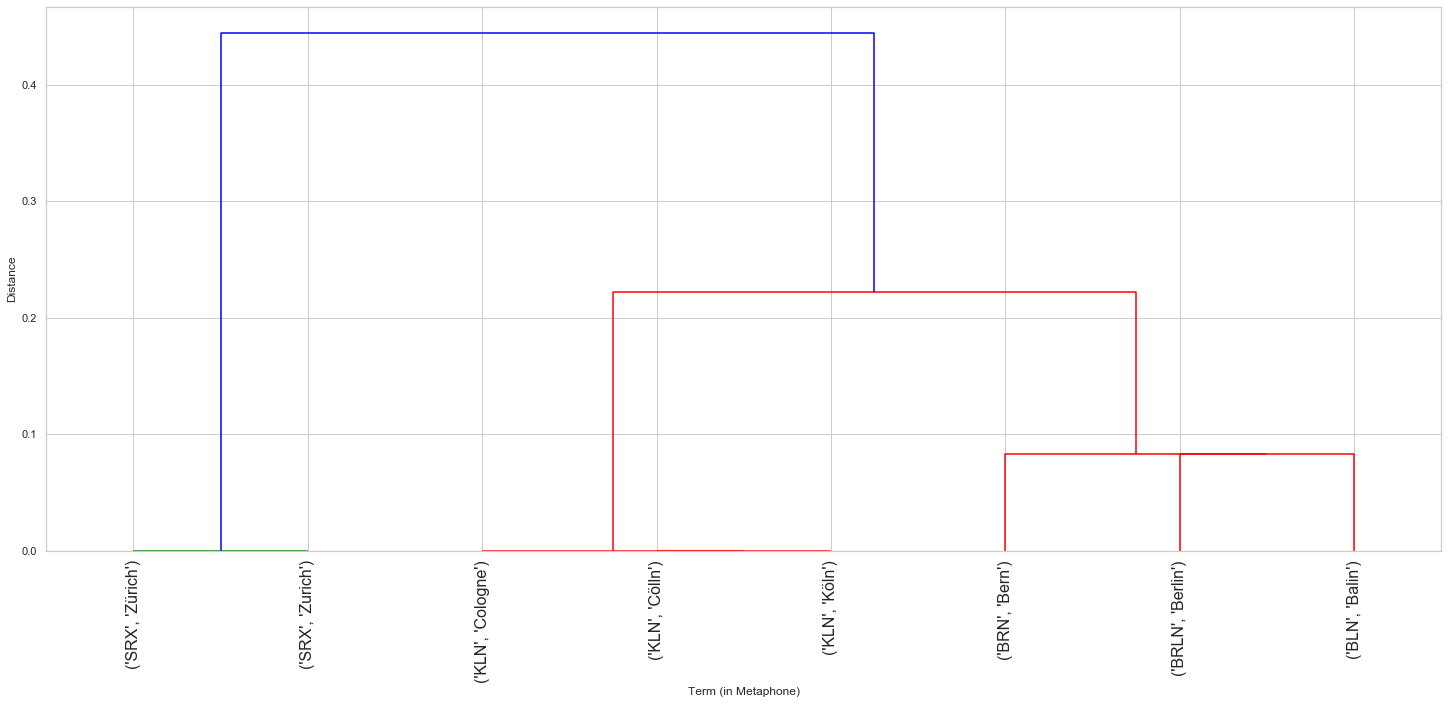

In [14]:
words = u'Berlin Balin Cölln Köln Cologne Zürich Zurich Bern'.split()

words2=list(map(metaphone,words))
term_labels=list(zip(words2,words))
words=words2



print("Number of words: %i" % len(words))
for i,val in enumerate(words):
    print(str(i)+":\t "+str(val.encode('utf-8')))
    
r=np.triu_indices(n=len(words), k=1)
r

r2=np.apply_along_axis(d_demo, 0, r)
r2

Z=scipycluster.linkage(r2,method='single')

plt.figure(figsize=(25, 10))
#plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Term (in Metaphone)')
plt.ylabel('Distance')
scipycluster.dendrogram(
        Z,
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=16.,  # font size for the x axis labels
        labels=term_labels
    )
plt.show()